# K-nearest neighbors Implementation

### 1. KNN Classifier with NumPy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('seaborn')
%matplotlib inline

In [2]:
df = load_iris(as_frame=True)['frame']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
feature_cols = ['sepal length (cm)', 'sepal width (cm)', 
                'petal length (cm)', 'petal width (cm)']

X = df[feature_cols]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

**KNN Classifier Implementation**

In [4]:
class KNNClassifier():
    
    '''
    Classifier implementing the k-nearest neighbors vote.
    '''
    
    def __init__(self, k=5, metric='minkowski', p=2):
        
        '''
        
        Parameters
        ----------
        k: int, default=5
        The number of neighbors to query
        
        metric: str/ callable default='minkowski' 
        The distance measure, 

        p: int, default=2
        Power parameter for the Minkowski metric. 
        This implementation use euclidean distance, synonymous with p = 2. 
        If p = 1, the distance metric is manhattan
        
        '''
        
        self.k = k
        self.p = p
        
        if metric == 'minkowski' and p == 2:
            self.dist_fn = self._euclidean_dist
            
        else:
            self.dist_fn = self._dist_with_arbitrary_p
            
            
    def _euclidean_dist(self, a, b):
        dist = 0
        for ele_i, ele_j in zip(a, b):
            dist += ((ele_i - ele_j)**2)
        dist = np.sqrt(dist)
        return dist
    
    
    def _dist_with_arbitrary_p(self, a, b): 
        dist = 0
        for ele_i, ele_j in zip(a, b):
            dist += np.power(abs(ele_i - ele_j), self.p)
        dist = np.power(dist, 1/self.p)
        return dist
    

    def _find_the_nearest(self, x):
        dist_idx_pairs = []
        for j in range(self.dataset_.shape[0]):
            d = self.dist_fn(x, self.dataset_[j])
            dist_idx_pairs.append((d, j))
        sorted_dist_idx_pairs = sorted(dist_idx_pairs)
        return sorted_dist_idx_pairs
    
    
    def fit(self, x, y):
        self.dataset_ = x.copy()
        self.labels_ = y.copy()
        self.possible_labels_ = np.unique(y)
        
    
    def predict(self, x):
        predictions = np.zeros(x.shape[0], dtype=int)
        for i in range(x.shape[0]):
            k_nearest = self._find_the_nearest(x[i])[:self.k]
            indicies = [entry[1] for entry in k_nearest]
            k_labels = self.labels_[indicies]
            counts = np.bincount(k_labels, minlength=self.possible_labels_.shape[0])
            pred_label = np.argmax(counts)
            predictions[i] = pred_label
        return predictions

In [5]:
k_range = range(1, 20)
acc_scores = []

for k in k_range:
    knn = KNNClassifier(k=k)
    knn.fit(X_train.values, y_train.values)
    y_pred = knn.predict(X_test.values)
    acc_scores.append(accuracy_score(y_test.values, y_pred))

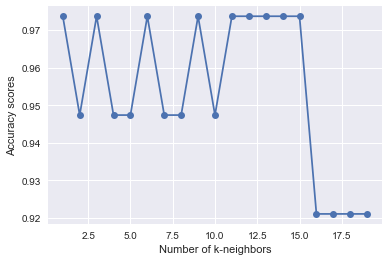

In [6]:
plt.plot(k_range, acc_scores, marker='o')
plt.xlabel('Number of k-neighbors')
plt.ylabel('Accuracy scores')
plt.show()

- Choose k = 13

In [7]:
knn = KNNClassifier(k=13, p=2)
knn.fit(X_train.values, y_train.values)
y_pred = knn.predict(X_test.values)
accuracy_score(y_test, y_pred)

0.9736842105263158

**Use scikit-learn**

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train.values, y_train.values)
y_pred = knn.predict(X_test.values)
accuracy_score(y_test, y_pred)

0.9736842105263158

### 2. KNN-Regressor with NumPy

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [10]:
feature_cols = ['TV', 'Newspaper']

X = df[feature_cols]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### KNN Regressor Implementation

In [11]:
class KNNRegressor():
    
    '''
    Regression based on k-nearest neighbors.

    The target is predicted by averaging the predictions of k-nearest neighbors
    '''
    
    def __init__(self, k=5, metric='minkowski', p=2):
        
        '''
        
        Parameters
        ----------
        k: int, default=5
        The number of neighbors to query
        
        metric: str/ callable default='minkowski' 
        The distance measure, 

        p: int, default=2
        Power parameter for the Minkowski metric. 
        This implementation use euclidean distance, synonymous with p = 2. 
        If p = 1, the distance metric is manhattan
        
        '''
        
        self.k = k
        self.p = p
        
        if metric == 'minkowski' and p == 2:
            self.dist_fn = self._euclidean_dist
            
        else:
            self.dist_fn = self._dist_with_arbitrary_p
            
            
    def _euclidean_dist(self, a, b):
        dist = 0
        for ele_i, ele_j in zip(a, b):
            dist += ((ele_i - ele_j)**2)
        dist = np.sqrt(dist)
        return dist
    
    
    def _dist_with_arbitrary_p(self, a, b): 
        dist = 0
        for ele_i, ele_j in zip(a, b):
            dist += np.power(abs(ele_i - ele_j), self.p)
        dist = np.power(dist, 1/self.p)
        return dist
    

    def _find_the_nearest(self, x):
        dist_idx_pairs = []
        for j in range(self.dataset_.shape[0]):
            d = self.dist_fn(x, self.dataset_[j])
            dist_idx_pairs.append((d, j))
        sorted_dist_idx_pairs = sorted(dist_idx_pairs)
        return sorted_dist_idx_pairs
    
    
    def fit(self, x, y):
        self.dataset_ = x.copy()
        self.labels_ = y.copy()
        self.possible_labels_ = np.unique(y)
        
    
    def predict(self, x):
        predictions = np.zeros(x.shape[0], dtype=float)
        for i in range(x.shape[0]):
            k_nearest = self._find_the_nearest(x[i])[:self.k]
            indicies = [entry[1] for entry in k_nearest]
            k_labels = self.labels_[indicies]
            pred_label = np.sum(k_labels) / self.k
            predictions[i] = pred_label
        return predictions

In [12]:
k_range = range(1, 20)
mse = []

for k in k_range:
    knn_reg = KNNRegressor(k=k)
    knn_reg.fit(X_train.values, y_train.values)
    y_pred = knn_reg.predict(X_test.values)
    mse.append(mean_squared_error(y_test.values, y_pred))

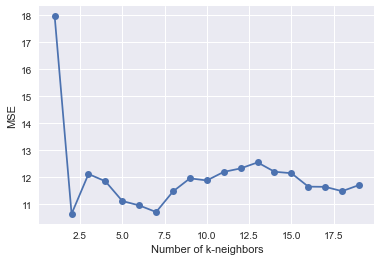

In [13]:
plt.plot(k_range, mse, marker='o')
plt.xlabel('Number of k-neighbors')
plt.ylabel('MSE')
plt.show()

- Choose k = 7

In [14]:
knn_reg = KNNRegressor(k=7)
knn_reg.fit(X_train.values, y_train.values)
y_pred = knn_reg.predict(X_test.values)
mean_squared_error(y_test, y_pred)

10.719865306122449

**Use scikit-learn**

In [15]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=7)
knn_reg.fit(X_train.values, y_train.values)
y_pred = knn_reg.predict(X_test.values)
mean_squared_error(y_test, y_pred)

10.719865306122449